# **Using YData to mitigate privacy risks**

Most of the datasets that store data related to people contain personal information that can be used to identify each individual. For ethical and (sometimes) legal reasons, such datasets need to be de-identified before being used or publicly published. De-identification consists in removing or anonymizing any data that can be used to identify a subject. YData offers a solution to this problem through synthetic data generation. After training a YData synthesizer with the original data, users are able to sample synthetic data which presents the original characteristics while preserving privacy. Therefore, the resulting synthetic dataset is faithful to the original one but is de-identified by nature.

A domain where personal attributes commonly exist is healthcare, particularly datasets that record patients' data concerning a specific disease. It is common for these datasets to have attributes that univocally identify a person, such as the full name, a social security number, or even a patient identifier. These attributes are called **direct identifiers** since their values are unique for each subject. However, these datasets can also contain attributes that alone are not direct identifiers, but when combined can identify a person. For example, let us assume a medical dataset that stores the age, weight, and height of each patient. By themselves, these attributes don't identify any patient. However, it's highly unlikely that there could be two patients with the same age, weight, and height. Therefore, when combining these three attributes, we are able to univocally identify a person within the dataset. The attributes which display these characteristics are called **quasi-identifiers** since their combined values can uniquely identify a person.

In this use case, we demonstrate how YData's synthesizer can be used to solve these privacy issues in a medical dataset, namely the [Cardiovascular Disease](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) dataset. Besides the original attributes, this version of the dataset also contains a patient identifier that is unique for every person, the patient's name, and the social security number. We start by performing a quick analysis of the dataset, and we move forward to show how YData's synthesizer solves the privacy issues for the direct and quasi-identifier attributes. We finish by calculating and discussing three privacy metrics for the synthetically generated data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata.metadata import Metadata
from ydata.labs import DataSources
from ydata.synthesizers.regular.model import RegularSynthesizer
from ydata.preprocessors.methods.anonymization import AnonymizerType
from ydata.report import SyntheticDataProfile

### **Cardiovascular Disease Dataset**

Let us start by obtaining the dataset from the YData data source previously created through the Fabric UI. We can then take a look at the first records of the dataset.

In [2]:
datasource = DataSources.get(uid='5357bf70-3f3b-4127-ac91-e059f4748ebf', 
                             namespace='7a25201e-768e-434a-bdea-c599245455aa')
data = datasource.read()

In [3]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,patient_id,name,ssn
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,HM-52100684,Jack Gardner-Sixtus,610-62-8364
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,IV-61832113,Kulnun Pichpandecha,153-76-2237
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,FW-67818205,Justin Baldick,665-37-2173
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,GF-83816286,Ivo Sá,661-70-4175
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,RW-63212154,Lisa Callahan,266-91-3083


This dataset has 70K rows and 15 columns (i.e., attributes). Describing each of the columns:
- age - age of the patient in days
- height - height of the patient in centimeters
- weight - weight of the patient in kilograms
- gender - gender of the patient (1: women, 2: men)
- ap_hi - systolic blood pressure
- ap_lo - diastolic blood pressure 
- cholesterol - cholesterol level (1: normal, 2: above normal, 3: well above normal)
- gluc - glucose level (1: normal, 2: above normal, 3: well above normal)
- smoke - whether the patient smokes (1) or not (0)
- alco -  whether the patient drinks alcohol (1) or not (0)
- active - whether the patient is physically active (1) or not (0)
- cardio - whether the patient has cardiovascular disease (1) or not (0)
- patient_id - patient unique identifier
- name - patient name
- ssn - patient social security number.

Since this dataset is mostly used to predict if a patient has cardiovascular disease or not, the `cardio` column is the more common target.

## **Direct Identifiers**

When analyzing the columns of the dataset, we can point out three attributes that uniquely identify each patient: `patient_id`, `name`, and `ssn`. Therefore, these attributes classify as direct identifiers. To keep the patients' privacy, we need to de-identify them in what concerns these columns. For this purpose, YData' synthesizer provides an anonymization feature that replaces these identifiers for pseudonyms or custom tokens. The synthesizer already comes with a set of predefined types of anonymization, but it also offers the capability of creating user-defined tokens.

To take advantage of this anonymization feature, the user has to create a dictionary that defines the type of anonymizer to be applied to the desired columns. Each entry in this dictionary uses the column name as the key and the anonymizer type as the value. Alternatively, the value can also be a regex expression representing the expected output format after the anonymization process. The dictionary is then passed to the `anonymize` parameter of the `fit` method.

We can then sample from the synthesizer to obtain the de-identified data.

In [4]:
patient_id_regex = r"[A-Z]{2}-[0-9]{8}"
anonymize = {
    "patient_id": patient_id_regex,
    "name": AnonymizerType.NAME,
    "ssn": AnonymizerType.SSN
}
synthesizer = RegularSynthesizer()
synthesizer.fit(data, Metadata(data), anonymize=anonymize)
synth_data = synthesizer.sample(len(data))

INFO: 2023-02-17 01:02:55,675 [SYNTHESIZER] - Number columns considered for synth: 15
INFO: 2023-02-17 01:04:16,537 [SYNTHESIZER] - Starting the synthetic data modeling process over 2x1 blocks.
INFO: 2023-02-17 01:04:16,538 [SYNTHESIZER] - Generating pipeline for segment (-0.001, 27999.5]
INFO: 2023-02-17 01:04:16,543 [SYNTHESIZER] - Preprocess segment
INFO: 2023-02-17 01:04:16,548 [SYNTHESIZER] - Synthesizer init.
INFO: 2023-02-17 01:04:16,549 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2023-02-17 01:04:27,668 [SYNTHESIZER] - Generating pipeline for segment (27999.5, 55999.0]
INFO: 2023-02-17 01:04:27,674 [SYNTHESIZER] - Preprocess segment
INFO: 2023-02-17 01:04:27,679 [SYNTHESIZER] - Synthesizer init.
INFO: 2023-02-17 01:04:27,680 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2023-02-17 01:04:38,174 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-02-17 01:04:38,175 [SYNTHESIZER] - Sample segment (-0.001, 27999.5]
INFO

In [5]:
synth_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,patient_id,name,ssn
0,18412,1,165,85.0,130,80,2,1,0,0,1,1,YD-65536279,Christopher Horton,761-35-1306
1,14552,1,164,66.4,90,60,1,1,0,0,1,0,AU-85885066,Amanda Chase,415-72-3054
2,17452,1,160,45.0,120,80,1,1,0,0,1,1,SH-85394264,Zachary Sanchez,122-96-0948
3,23617,2,185,87.0,120,80,1,1,0,0,0,0,NT-71998345,Brian Maldonado,835-40-3911
4,22579,1,162,105.0,150,90,1,1,0,0,1,1,UJ-14684173,Renee Chapman,166-16-1377


The direct identifiers have the same format in the synthetic and original data. However, as seen in the code blocks below, the identifiers from the synthetic data are essentially different from the ones in the original data, except for a small percentage of names since different people can have the same first and last names. Therefore, the patients are no longer identifiable in the synthetic data. In other words, the dataset is de-identified in what concerns direct identifiers.

In [6]:
data_df = data.to_pandas()
synth_data_df = synth_data.to_pandas()

In [7]:
# TODO: remove this prior to releasing
# FIXME: there is a bug with the anonymizer that is generating duplicated values (known bug)
from ydata.preprocessors.methods.anonymization.utils import get_n_unique_from_one, get_one_regex
from ydata.preprocessors.methods.anonymization.anonymizer import name_anonymizer, ssn_anonymizer
synth_data_df["patient_id"] = get_n_unique_from_one(get_one_regex(patient_id_regex), len(synth_data_df))
synth_data_df["name"] = name_anonymizer(data_df[["name"]], {"name": data_df["name"].nunique()})["name"]
synth_data_df["ssn"] = ssn_anonymizer(data_df[["ssn"]], {"ssn": data_df["ssn"].nunique()})["ssn"]

In [8]:
pid_orig = set(data_df["patient_id"].unique())
pid_synth = set(synth_data_df["patient_id"].unique())
print(f"\033[1mUnique patient identifiers on the original data: {len(pid_orig)}")
print(f"\033[1mUnique patient identifiers on the synthetic data: {len(pid_synth)}")
print(f"\033[1mPatient identifiers shared by the original and synthetic data: {len(pid_orig & pid_synth)}")

Unique patient identifiers on the original data: 70000
Unique patient identifiers on the synthetic data: 70000
Patient identifiers shared by the original and synthetic data: 0


In [9]:
name_orig = set(data_df["name"].unique())
name_synth = set(synth_data_df["name"].unique())
print(f"\033[1mUnique patient names on the original data: {len(name_orig)}")
print(f"\033[1mUnique patient names on the synthetic data: {len(name_synth)}")
print(f"\033[1mPatient names shared by the original and synthetic data: {len(name_orig & name_synth)}")

Unique patient names on the original data: 61143
Unique patient names on the synthetic data: 61143
Patient names shared by the original and synthetic data: 9317


In [20]:
ssn_orig = set(data_df["ssn"].unique())
ssn_synth = set(synth_data_df["ssn"].unique())
print(f"\033[1mUnique patient SSNs on the original data: {len(ssn_orig)}")
print(f"\033[1mUnique patient SSNs on the synthetic data: {len(ssn_synth)}")
print(f"\033[1mPatient SNNs shared by the original and synthetic data: {len(ssn_orig & ssn_synth)}")

Unique patient SSNs on the original data: 69994
Unique patient SSNs on the synthetic data: 69994
Patient SNNs shared by the original and synthetic data: 7


## **Quasi-identifiers**

Most attributes that represent a characteristic of an individual can be considered quasi-identifiers. In this dataset, there are three columns that naturally fit this description: `age`, `height`, and `weight`. However, after analyzing the table below, which displays the percentage of patients that can be uniquely identifiable when combining all columns of the dataset in pairs of two, there are two other columns that classify as quasi-identifiers: `ap_hi` and `ap_lo`. Although these latter two attributes seem less capable of representing a subject, it is important to take into account their domain and variability. Blood pressure is highly volatile throughout the day, and can increase or decrease rapidly according to many external factors. Therefore, it is highly unlikely that two individuals with a given age, height, or weight (or any combination of the three) have the same blood pressure. For that reason, systolic and diastolic blood pressure are also quasi-identifiers in this context.

In [11]:
def count_unique_rows(df: pd.DataFrame):
    matrix = pd.DataFrame()
    for i, col1 in enumerate(df.columns):
        vals = {}
        for col2 in df.columns[i+1:]:
            vals[col2] = f"{((df[[col1, col2]].value_counts() == 1).sum() / len(df)) * 100:.1f}%"
        matrix = pd.concat([matrix, pd.Series(vals, name=col1).astype("string").to_frame().T])
    return matrix.fillna("").T

count_unique_rows(data_df.drop(columns=["patient_id", "name", "ssn"]))

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,3.6%,,,,,,,,,,,
height,64.8%,0.1%,,,,,,,,,,
weight,76.2%,0.2%,1.5%,,,,,,,,,
ap_hi,26.7%,0.1%,1.2%,1.8%,,,,,,,,
ap_lo,18.8%,0.1%,1.1%,1.6%,1.1%,,,,,,,
cholesterol,7.5%,0.0%,0.1%,0.3%,0.1%,0.1%,,,,,,
gluc,7.5%,0.0%,0.1%,0.2%,0.1%,0.1%,0.0%,,,,,
smoke,4.5%,0.0%,0.1%,0.2%,0.1%,0.1%,0.0%,0.0%,,,,
alco,4.1%,0.0%,0.0%,0.2%,0.1%,0.1%,0.0%,0.0%,0.0%,,,
active,4.3%,0.0%,0.1%,0.2%,0.1%,0.1%,0.0%,0.0%,0.0%,0.0%,,


Focusing just on the age and weight attributes, we can see from the image below that the 76.2% of uniquely identifiable patients are not localized in particular spectrums of the attributes' domains (i.e., they are not related to potential outliers or extreme values). Therefore, the combination of these two attributes allows for direct identification of patients.

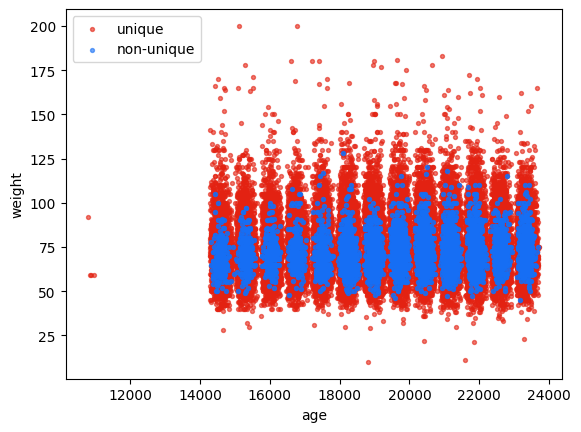

In [12]:
groups = data_df.groupby(["age", "weight"])
unique = set()
for k in groups.groups:
    g = groups.get_group(k)
    if len(g) == 1:
        unique.add(g.index[0])
mask = [idx in unique for idx in data_df.index]
df_comb = data_df[["age", "weight"]].copy()
df_comb["label"] = ["unique" if x else "non-unique" for x in mask]
groups = df_comb.groupby("label")
for (name, group), color in reversed(list(zip(groups, ["#166FF5", "#E32212"]))):
    plt.scatter(group["age"], group["weight"], s=8, color=color, alpha=0.6, label=name)
plt.gca().legend()
_ = plt.ylabel("weight")
_ = plt.xlabel("age")

When considering the synthetic data generated, we find the same identifiability patterns as in the original data. The table below shows once again the percentage of patients that can be uniquely identifiable when combining all columns of the dataset in pairs of two, but now for YData's synthesizer data. As expected, we see the same patterns based on the same quasi-identifiers, which means the synthesizer correctly reproduced the characteristics of the original data.

In [13]:
count_unique_rows(synth_data_df.drop(columns=["patient_id", "name", "ssn"]))

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,3.3%,,,,,,,,,,,
height,48.5%,0.0%,,,,,,,,,,
weight,66.3%,0.1%,0.9%,,,,,,,,,
ap_hi,24.6%,0.0%,0.9%,1.0%,,,,,,,,
ap_lo,17.4%,0.0%,0.8%,1.1%,0.6%,,,,,,,
cholesterol,7.1%,0.0%,0.1%,0.1%,0.1%,0.1%,,,,,,
gluc,7.0%,0.0%,0.1%,0.1%,0.1%,0.1%,0.0%,,,,,
smoke,4.0%,0.0%,0.0%,0.1%,0.1%,0.1%,0.0%,0.0%,,,,
alco,3.7%,0.0%,0.0%,0.1%,0.1%,0.1%,0.0%,0.0%,0.0%,,,
active,3.9%,0.0%,0.0%,0.1%,0.1%,0.1%,0.0%,0.0%,0.0%,0.0%,,


Nevertheless, YData's synthesizer was able to provide de-identified data without privacy leakage. Although both the synthetic and original data present the same characteristics, the set of uniquely identifiable patients is different in both datasets, apart from a small intersection group of approximately 5%. We can state that the uniquely identifiable patients are different because the combined values for the quasi-identifiers are not the same in the original and synthetic data. Therefore, the synthetic data presents the same characteristics and patterns as the original data, but ensures that the personal information of the patients is protected since it can not be traced back.

In [14]:
original_group = data_df.groupby(["age", "height", "weight", "ap_hi", "ap_lo"])
synth_group = synth_data_df.groupby(["age", "height", "weight", "ap_hi", "ap_lo"])
original_keys = [k for k, g in original_group.groups.items() if len(g) == 1]
synth_keys = [k for k, g in synth_group.groups.items() if len(g) == 1]

In [15]:
print(f"\033[1mNumber of uniquely identifiable combinations of quasi-identifiers on the original data: {len(original_keys)}")
print(f"\033[1mNumber of uniquely identifiable combinations of quasi-identifiers on the synthetic data: {len(synth_keys)}")
num_comb_inter = len(set(original_keys) & set(synth_keys))
print(f"\033[1mNumber of uniquely identifiable combinations of quasi-identifiers shared by the original and synthetic data: {num_comb_inter} ({(num_comb_inter / len(original_keys) * 100):.1f}% of the combinations in the original data)")

Number of uniquely identifiable combinations of quasi-identifiers on the original data: 69726
Number of uniquely identifiable combinations of quasi-identifiers on the synthetic data: 65744
Number of uniquely identifiable combinations of quasi-identifiers shared by the original and synthetic data: 3058 (4.4% of the combinations in the original data)


Even when considering the small percentage of patients whose quasi-identifiers are the same in the original and synthetic data, we can see that all of them present different values for one or more of the remaining columns, making traceability and re-identification very difficult. We can see below the percentage of these patients that have one or more non-identifiable attributes with different values in the original and synthetic data.

In [16]:
diff_columns = {}
for k in set(original_keys) & set(synth_keys):
    orow = original_group.get_group(k).iloc[0]
    srow = synth_group.get_group(k).iloc[0]
    count = (orow != srow).sum()
    if count not in diff_columns:
        diff_columns[count] = 0
    diff_columns[count] += 1

In [17]:
for i in range(0, 8):
    if i in diff_columns.keys():
        print(f"\033[1mPercentage of patients with {i} different non-identifiable attribute(s): {(diff_columns[i] / num_comb_inter) * 100:.1f}%")

Percentage of patients with 3 different non-identifiable attribute(s): 43.5%
Percentage of patients with 4 different non-identifiable attribute(s): 27.0%
Percentage of patients with 5 different non-identifiable attribute(s): 17.2%
Percentage of patients with 6 different non-identifiable attribute(s): 9.0%
Percentage of patients with 7 different non-identifiable attribute(s): 3.1%


In conclusion, we can see that YData's synthesizer is able to reproduce the characteristics and patterns of the original data while keeping the patients' privacy by not leaking personal information and preventing re-identification. Such claims are supported by two main facts: the combinations of quasi-identifiers shared by the original and synthetic data are minimal, and even the small percentage of patients that are shared have different values for the remaining non-identifiable attributes.

## **Privacy Metrics**

To further reinforce the privacy qualities of YData's synthesizer, we present the scores for three privacy metrics that are calculated between the original and synthetic data:
- Exact Matches: counts the number of sensitive records in the synthetic data that match the records in the original dataset.
- Neighbors Privacy: measures the likelihood of finding the original data points within a certain radius of the synthetic data points, which accounts for how close these synthetic data points are to the original data point.
- Synthetic Classifier: evaluates if an attacker can distinguish synthetic data records from real ones.

We use YData's reporting tool to obtain the mentioned metrics, and we remove the direct identifiers prior to the calculation.

In [18]:
data.drop_columns(columns=["patient_id", "name", "ssn"], inplace=True)
synth_data.drop_columns(columns=["patient_id", "name", "ssn"], inplace=True)
privacy_metrics = SyntheticDataProfile().get_privacy_metrics(data, synth_data, Metadata(data))

In [19]:
print(f"\033[1mExact Matches: {privacy_metrics['exact_matches']:.2f}")
print(f"\033[1mNeighbors Privacy: {privacy_metrics['neighbours_privacy']:.2f}")
print(f"\033[1mSynthetic Classifier: {privacy_metrics['synth_classifier']:.2f}")

Exact Matches: 0.02
Neighbors Privacy: 0.99
Synthetic Classifier: 1.00


From the privacy metrics' scores, we can extrapolate the following additional conclusions:
- The number of exact matches is very small (2%), which means the YData's synthesizer is capable of generating synthetic data that presents the same properties as the original data without simply copying it. As a consequence, the synthesizer ensures privacy and de-identification of the original data, since the personal information of the patients is not replicated in the synthetic data. Further investigation could be performed to understand the origin of the 2% exact matches, but this amount of replication is not significant enough to compromise the patients' privacy.
- The neighbors' privacy score is close to 1, which would be the perfect score. Such a high score shows the robustness of YData's synthesizer since it is capable of mimicking the original data characteristics without generating data points too similar to the original data. In other words, the synthesizer presents an excellent balance between reproducing the original data proprieties and generating new unseen samples. This characteristic of the synthesizer is essential to provide good fidelity combined with high privacy.
- The synthetic classifier also presents a score close to 1, which means the estimator is unable to distinguish between the original and synthetic data. As a consequence, the synthetic data is safe to be shared without compromising the patients' privacy.

In conclusion, YData's synthesizer excels in all the privacy metrics, which further reinforces its privacy qualities. The synthesizer is able to produce synthetic data that can't be traced back and re-identified, ensuring minimal to no data leakage.